<a href="https://colab.research.google.com/github/rynB2/AI/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import sklearn
import nltk
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.util import ngrams
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree as tr



In [41]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], #imports the IMBD dataset from tensorflow, code from https://www.tensorflow.org/hub/tutorials/tf2_text_classification
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)



In [57]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))
full_dataset = np.concatenate((train_examples, test_examples), axis=0) #concatenate so that we can use full dataset for unigrams etc
all_labels = np.concatenate((train_labels, test_labels), axis=0)

Training entries: 25000, test entries: 25000


In [66]:
df = pd.DataFrame(data=full_dataset, index=None, columns=None) #creates a pandas dataframe of every sentence in the dataset, then turns the dataframe from a numpy array type into a string.  

df_str = df[0].str.decode("utf-8")
df_str.name = 'sentence' #names the dataframe

df_labels = pd.DataFrame(data=all_labels, index=None, columns=None)

df_str_subset = df_str.sample(frac=0.25, replace=True, random_state=1) #we use a random subset of our data for our bag of words as the size of dataframe would otherwise crash colab
df_labels_subset = df_labels.sample(frac=0.25, replace=True, random_state=1) #random subset of labels with same seed as above so they match
#df_str

#df_str_subset 
df_labels_subset

,0
33003,0
12172,1
5192,0
32511,1
43723,1
...,...
3876,1
40702,0
36088,1
2668,1


In [25]:
nltk.download('punkt') #for use in finding ngrams, code from practical
from nltk import word_tokenize
from nltk import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
def extract_unigram(sentences): #extracts unigrams, code from practical

  tokens = []
  for sentence in df_str:
    tok = word_tokenize(sentence)
    for t in tok:
      tokens.append(t)
  return tokens

In [27]:
def extract_bigram(sentences): #extracts bigrams, code from practical

  all_bigrams = []
  for sentence in df_str:
    token = word_tokenize(sentence)
    bigrams = ngrams(token,2)
    for b in bigrams:
      all_bigrams.append(b)
  return all_bigrams

In [ ]:
extracted_bigrams = extract_bigram(df_str)
extracted_bigrams

In [ ]:
extracted_unigrams = extract_unigram(df_str)
extracted_unigrams


In [10]:
str_unigrams=(" ").join(extracted_unigrams) #generates a wordcloud to show most used unigrams
stopwords_set = {"br", ",", "<", ">", ".", ":"} #"words" to be excluded from wordcloud
#stopwords = set(STOPWORDS) commented out as it excluded common words we could want
wordcloud = WordCloud(width = 1280, height = 720, 
                background_color ='black', 
                stopwords = stopwords_set, 
                min_font_size = 10,).generate(str_unigrams) 


In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
Counter(extracted_unigrams).most_common(20)

In [ ]:
Counter(extracted_bigrams).most_common(20)

In [8]:
vectorizer = CountVectorizer()
sentences_as_bag_of_words = vectorizer.fit_transform(df_str_subset)


In [ ]:
for w in sentences_as_bag_of_words[6]: 
  print(w)

In [ ]:
vectorizer.get_feature_names()

In [11]:
bow_vectors = sentences_as_bag_of_words.toarray()

In [54]:
bow_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
vectorizer.vocabulary_.get('br')

6338

In [ ]:
words_dataframe = pd.DataFrame(bow_vectors)     
words_dataframe
df_labels_subset

In [71]:
train_features = words_dataframe.iloc[:10000, :-1]
test_features = words_dataframe.iloc[10000:,:-1]
train_labels = df_labels_subset.iloc[:10000,-1]
test_labels = df_labels_subset.iloc[10000:,-1]

test_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54741,54742,54743,54744,54745,54746,54747,54748,54749,54750,54751,54752,54753,54754,54755,54756,54757,54758,54759,54760,54761,54762,54763,54764,54765,54766,54767,54768,54769,54770,54771,54772,54773,54774,54775,54776,54777,54778,54779,54780
10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_labels)

In [73]:
#The accuracy is then calculated through the score function offered by sklearn
print("The prediction accuracy is: ", tree.score(test_features,test_labels)*100,"%")

The prediction accuracy is:  75.96000000000001 %


In [74]:
prediction = tree.predict(test_features)
prediction

array([1, 1, 0, ..., 1, 1, 0])

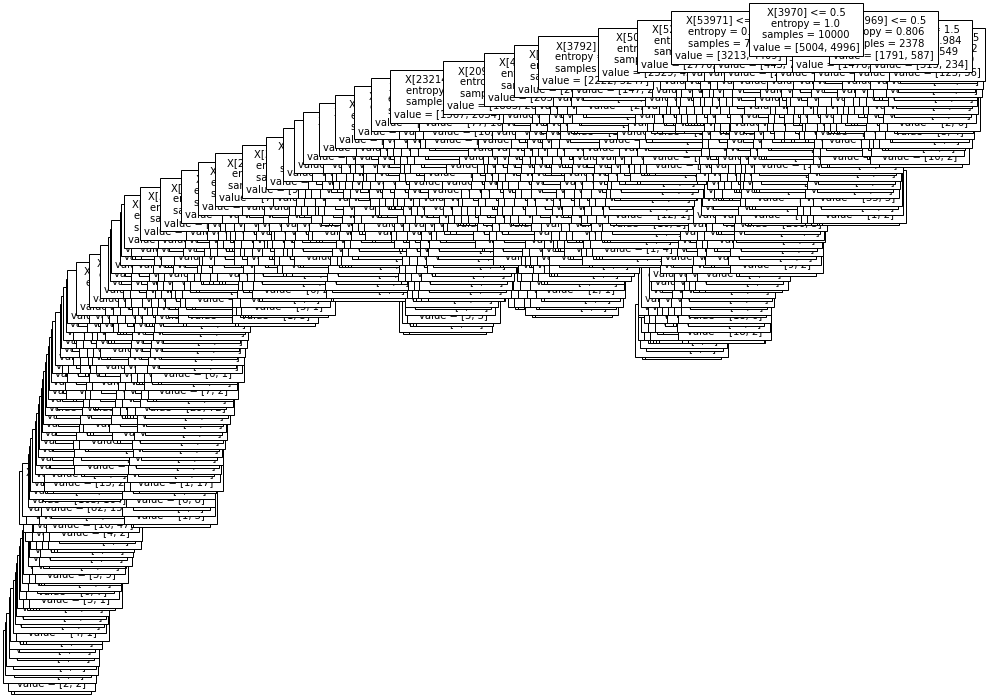

In [78]:
fig, ax = plt.subplots(figsize=(16, 12))
tr.plot_tree(tree, max_depth=100, fontsize=10)
plt.show()